In [80]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [81]:
'''
@description: this function reads in a series of filenames and separates them into clean + dirty filenames
@params: all_files - the filename of all batch .csv files, should be of the form 'filepath/*.csv'
@return: clean_files - list, sorted list of all clean data filenames
         dirty_files - list, sorted list of all dirty data filenames
'''
def partition_data_files(all_files):
    data = glob.glob(all_files)
    dirty_files = []
    clean_files = []
    
    for file in data:
        if 'dirty' in file:
            dirty_files.append(file)
        else:
            clean_files.append(file)
            
    #sort in place with our custom sort function (written below)
    dirty_files.sort(key=filename_num) 
    clean_files.sort(key=filename_num)
    
    return clean_files, dirty_files

'''
@description: used in partition_data_files; helper function for .sort(key=____)
              bc Python doesn't sort the filename strings in the order we want by default
@params: filename - the single filename we want the number (integer order) of
@return: order_number - the number of the file
    
'''
def filename_num(filename):
    remove_csv = filename.split('.')[0]
    number = remove_csv.split('_')[-1]
    return int(number)

In [82]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts/*.csv')

In [112]:
'''
@description: this function generates the completeness ratio dataframes for both clean and dirty data files
@params: clean_files - list of strings, clean filenames
         dirty_files - list of strings, dirty filenames
@return: clean_completeness_ratio_df - dataframe of the ratio of nulls to non-nulls in the clean dataframe
         dirty_completeness_ratio_df - dataframe of the ratio of nulls to non-nulls in the dirty dataframe
'''
def completeness_dataframes(clean_files, dirty_files):
    clean_completeness_ratio_df = pd.DataFrame()
    dirty_completeness_ratio_df = pd.DataFrame()
    
    for file in clean_files:
        data = pd.read_csv(file)

        #get null_counts for all columns
        null_counts = data.isnull().sum()
        #get not null_counts for all columns
        not_null_counts = data.shape[0] - null_counts

        #get ratio
        ratio = null_counts/not_null_counts

        #add to df
        clean_completeness_ratio_df[file] = ratio
        
    for file in dirty_files:
        data = pd.read_csv(file)

        #get null_counts for all columns
        null_counts = data.isnull().sum()
        #get not null_counts for all columns
        not_null_counts = data.shape[0] - null_counts

        #get ratio
        ratio = null_counts/not_null_counts

        #add to df
        dirty_completeness_ratio_df[file] = ratio
        
    return clean_completeness_ratio_df, dirty_completeness_ratio_df

'''
@description: this function generates the distinct counts dataframes for both clean and dirty data files
@params: clean_files - list of strings, clean filenames
         dirty_files - list of strings, dirty filenames
@return: clean_distinct_counts_df - dataframe of the ratio of nulls to non-nulls in the clean dataframe
         dirty_distinct_counts_df - dataframe of the ratio of nulls to non-nulls in the dirty dataframe
'''
def distinct_counts_dataframes(clean_files, dirty_files):
    clean_distinct_counts_df = pd.DataFrame()
    dirty_distinct_counts_df = pd.DataFrame()
    
    for file in clean_files:
        clean_distinct_counts_df[file] = data.nunique()
    for file in dirty_files:
        dirty_distinct_counts_df[dirty_flights_file] = data.nunique()
    
    return clean_distinct_counts_df, dirty_distinct_counts_df

In [113]:
flights_clean_completeness_ratio_df, flights_dirty_completeness_ratio_df = completeness_dataframes(clean_flights, dirty_flights)

In [116]:
flights_clean_completeness_ratio_df.T.head() #transpose looks better to me?

,RowId,Source,Flight,ScheduledDeparture,ActualDeparture,DepartureGate,ScheduledArrival,ActualArrival,ArrivalGate,for_key,date
tmp/FLIGHTS/FLIGHTS_clean_734472.csv,0.0,0.0,0.0,0.0,0.064262,0.196737,0.0,0.116087,0.196737,0.0,0.0
tmp/FLIGHTS/FLIGHTS_clean_734473.csv,0.0,0.0,0.0,0.0,0.068562,0.186079,0.0,0.119089,0.186079,0.0,0.0
tmp/FLIGHTS/FLIGHTS_clean_734474.csv,0.0,0.0,0.0,0.0,0.076771,0.177044,0.0,0.137029,0.177044,0.0,0.0
tmp/FLIGHTS/FLIGHTS_clean_734475.csv,0.0,0.0,0.0,0.0,0.073567,0.205572,0.0,0.117045,0.205572,0.0,0.0
tmp/FLIGHTS/FLIGHTS_clean_734476.csv,0.0,0.0,0.0,0.0,0.070826,0.184701,0.0,0.124889,0.184701,0.0,0.0


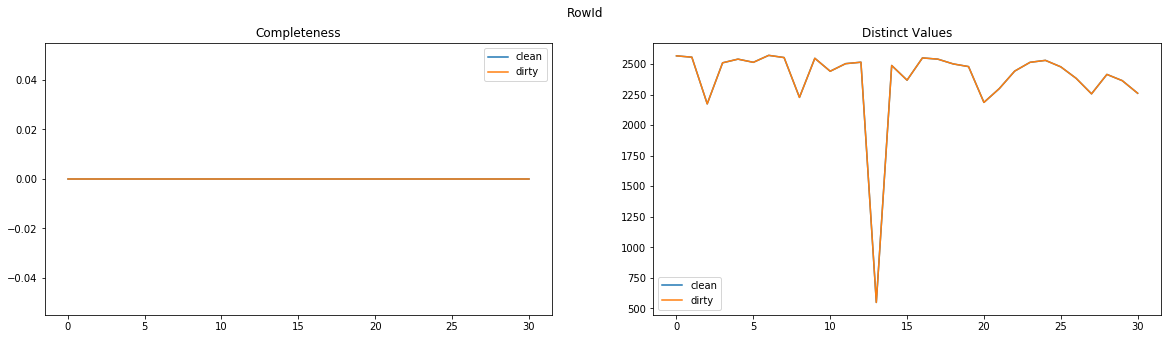

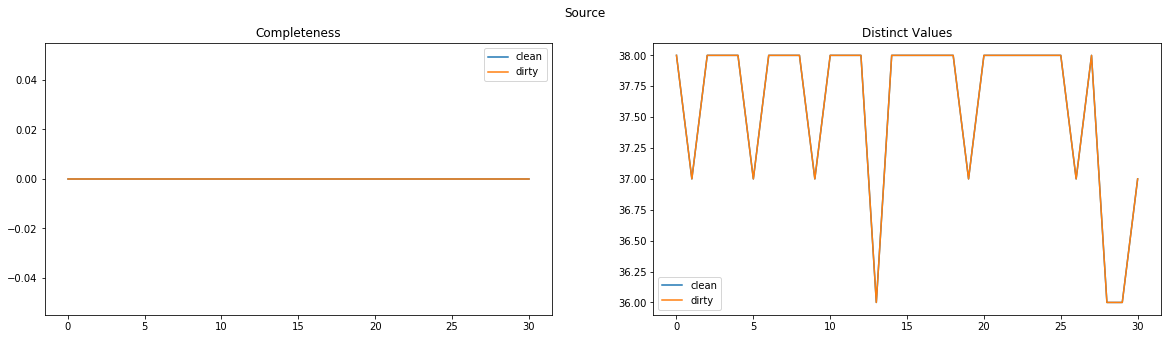

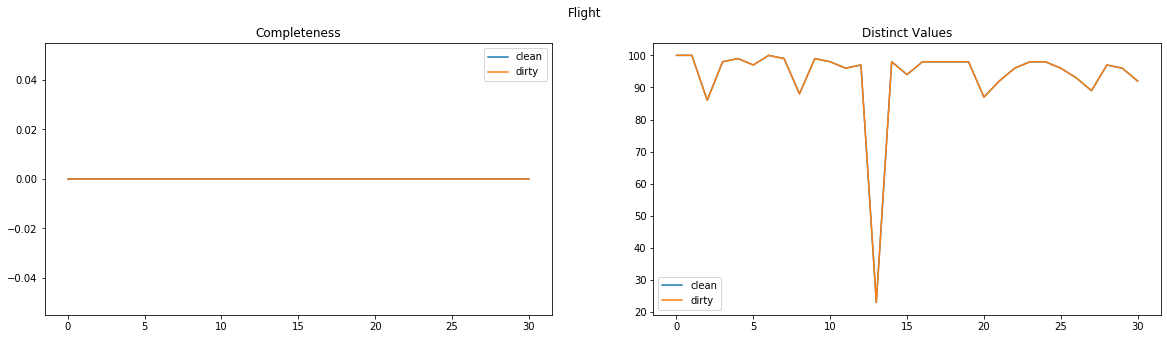

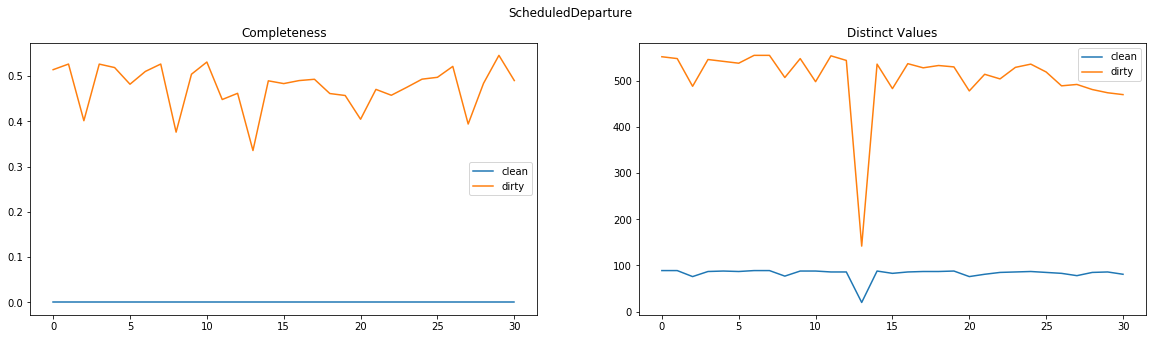

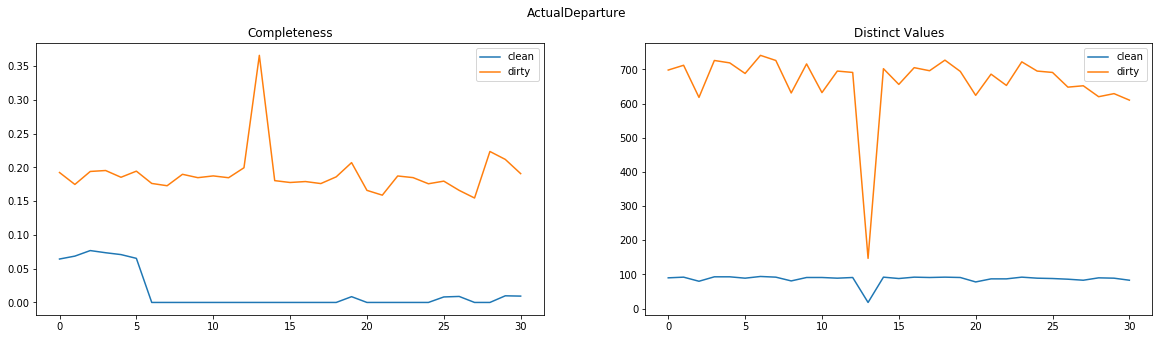

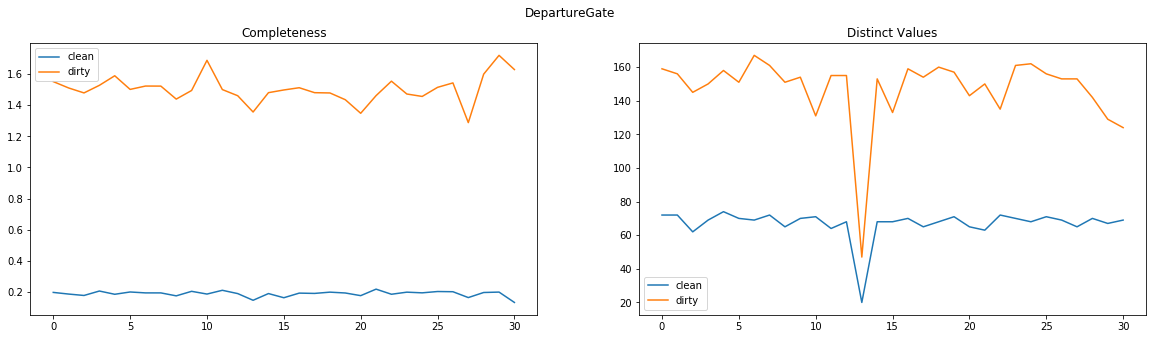

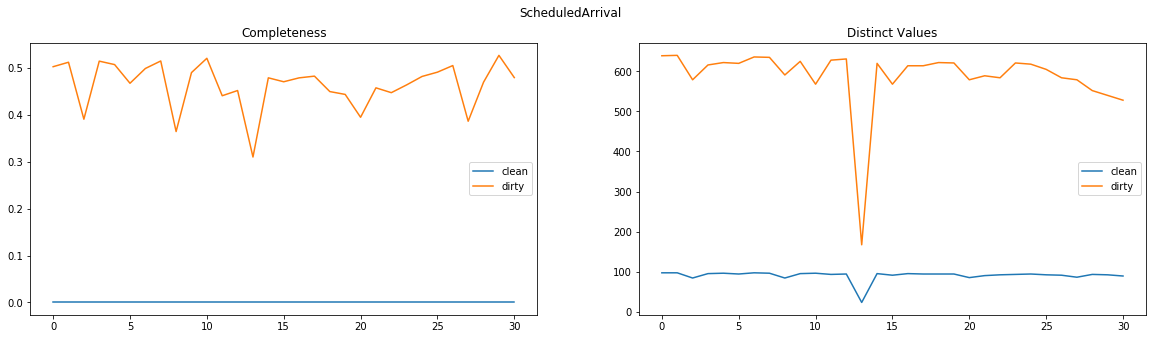

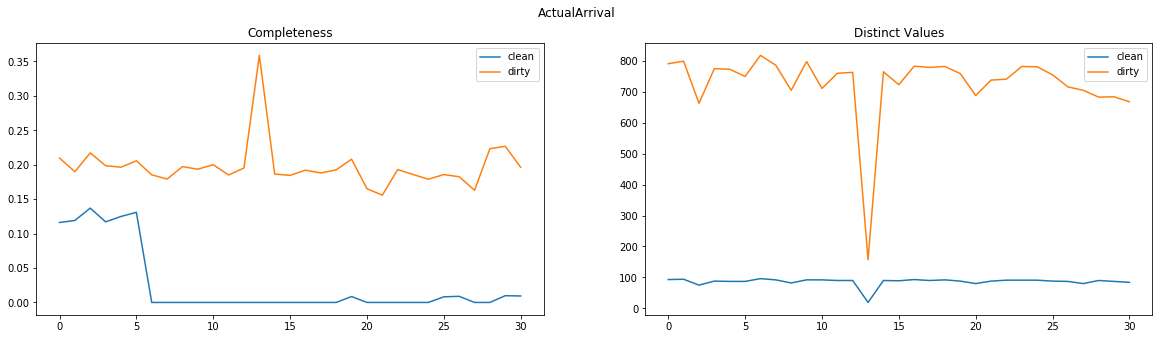

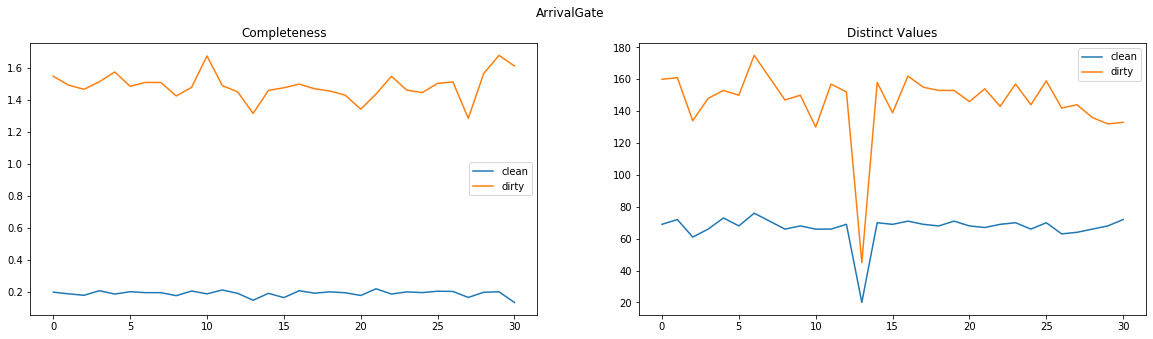

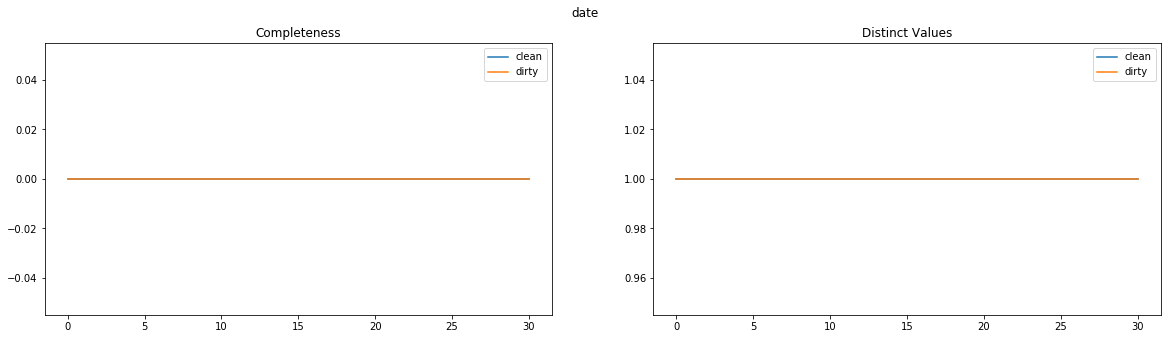

In [119]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()